In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\User\\Desktop\\важно\\hse_project\\flats_moscow_mod.csv', sep=';')
df

,price,totsp,livesp,kitsp,dist,metrdist
0,83,64,42,9,17.0,10
1,107,67,41,9,12.5,10
2,160,101,51,15,7.0,7
3,127,76,54,6,9.0,5
4,83,57,44,6,17.0,10
...,...,...,...,...,...,...
1525,105,78,45,10,13.0,10
1526,180,81,50,11,7.5,5
1527,81,56,39,6,11.5,10
1528,115,77,50,9,6.0,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1530 non-null   int64  
 1   totsp     1530 non-null   int64  
 2   livesp    1530 non-null   int64  
 3   kitsp     1530 non-null   int64  
 4   dist      1530 non-null   float64
 5   metrdist  1530 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 71.8 KB


Ну вроде проверили на пропуски и их нет

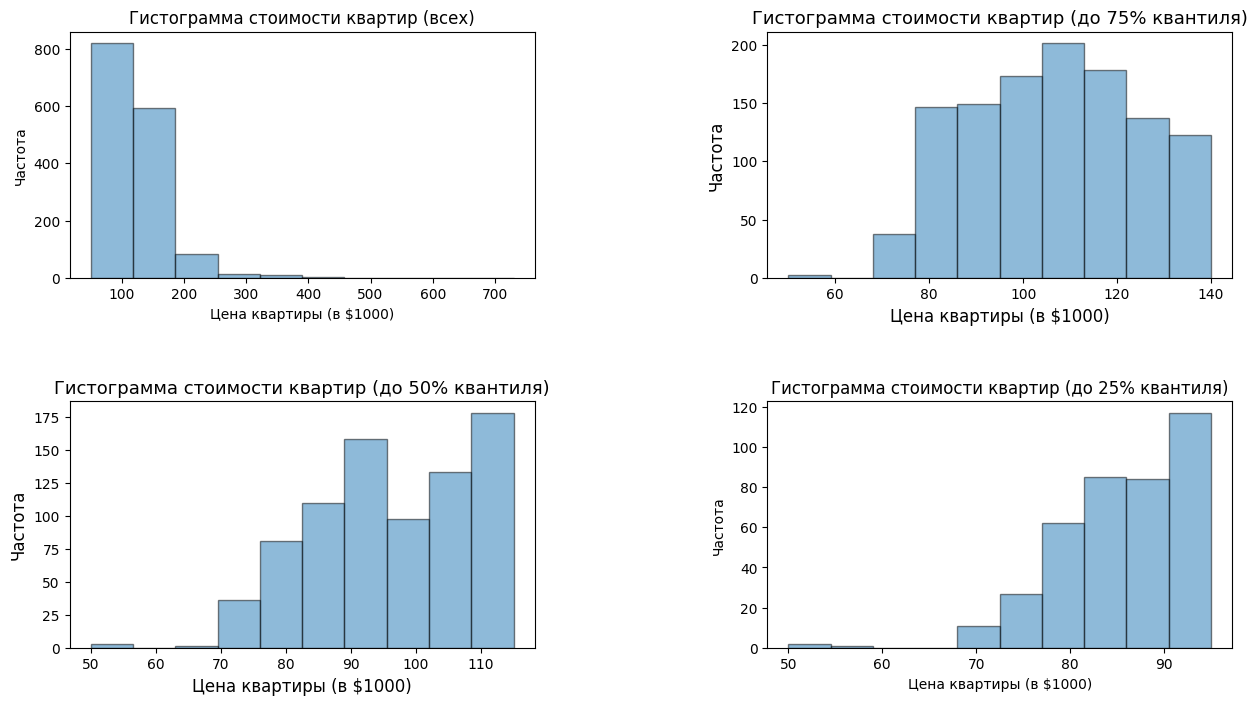

In [7]:
fig, axs = plt.subplots(2, 2, figsize = (15, 8))

axs[0, 0].hist(df['price'], edgecolor='black', alpha=0.5)
axs[0, 0].set_title('Гистограмма стоимости квартир (всех)')
axs[0, 0].set_xlabel('Цена квартиры (в $1000)')
axs[0, 0].set_ylabel('Частота')
axs[0, 1].hist(df.loc[df['price'] <= np.percentile(df['price'], 75), ['price']].copy(), edgecolor='black', alpha = 0.5) # до 75% квантиля
axs[0, 1].set_title('Гистограмма стоимости квартир (до 75% квантиля)', fontsize = 13)
axs[0, 1].set_xlabel('Цена квартиры (в $1000)', fontsize = 12)
axs[0, 1].set_ylabel('Частота', fontsize = 12)
axs[1, 0].hist(df.loc[df['price'] <= np.percentile(df['price'], 50), ['price']].copy(), edgecolor='black', alpha = 0.5) # до 50% квантиля
axs[1, 0].set_title('Гистограмма стоимости квартир (до 50% квантиля)', fontsize = 13)
axs[1, 0].set_xlabel('Цена квартиры (в $1000)', fontsize = 12)
axs[1, 0].set_ylabel('Частота', fontsize = 12)
axs[1, 1].hist(df.loc[df['price'] <= np.percentile(df['price'], 25), ['price']].copy(), edgecolor='black', alpha=0.5) # до 25% квантиля
axs[1, 1].set_title('Гистограмма стоимости квартир (до 25% квантиля)');
axs[1, 1].set_xlabel('Цена квартиры (в $1000)')
axs[1, 1].set_ylabel('Частота')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

Стоимость большинства квартир 100 000$ 

Text(0.5, 1.0, 'Зависимость цены от расстояния до центра ')

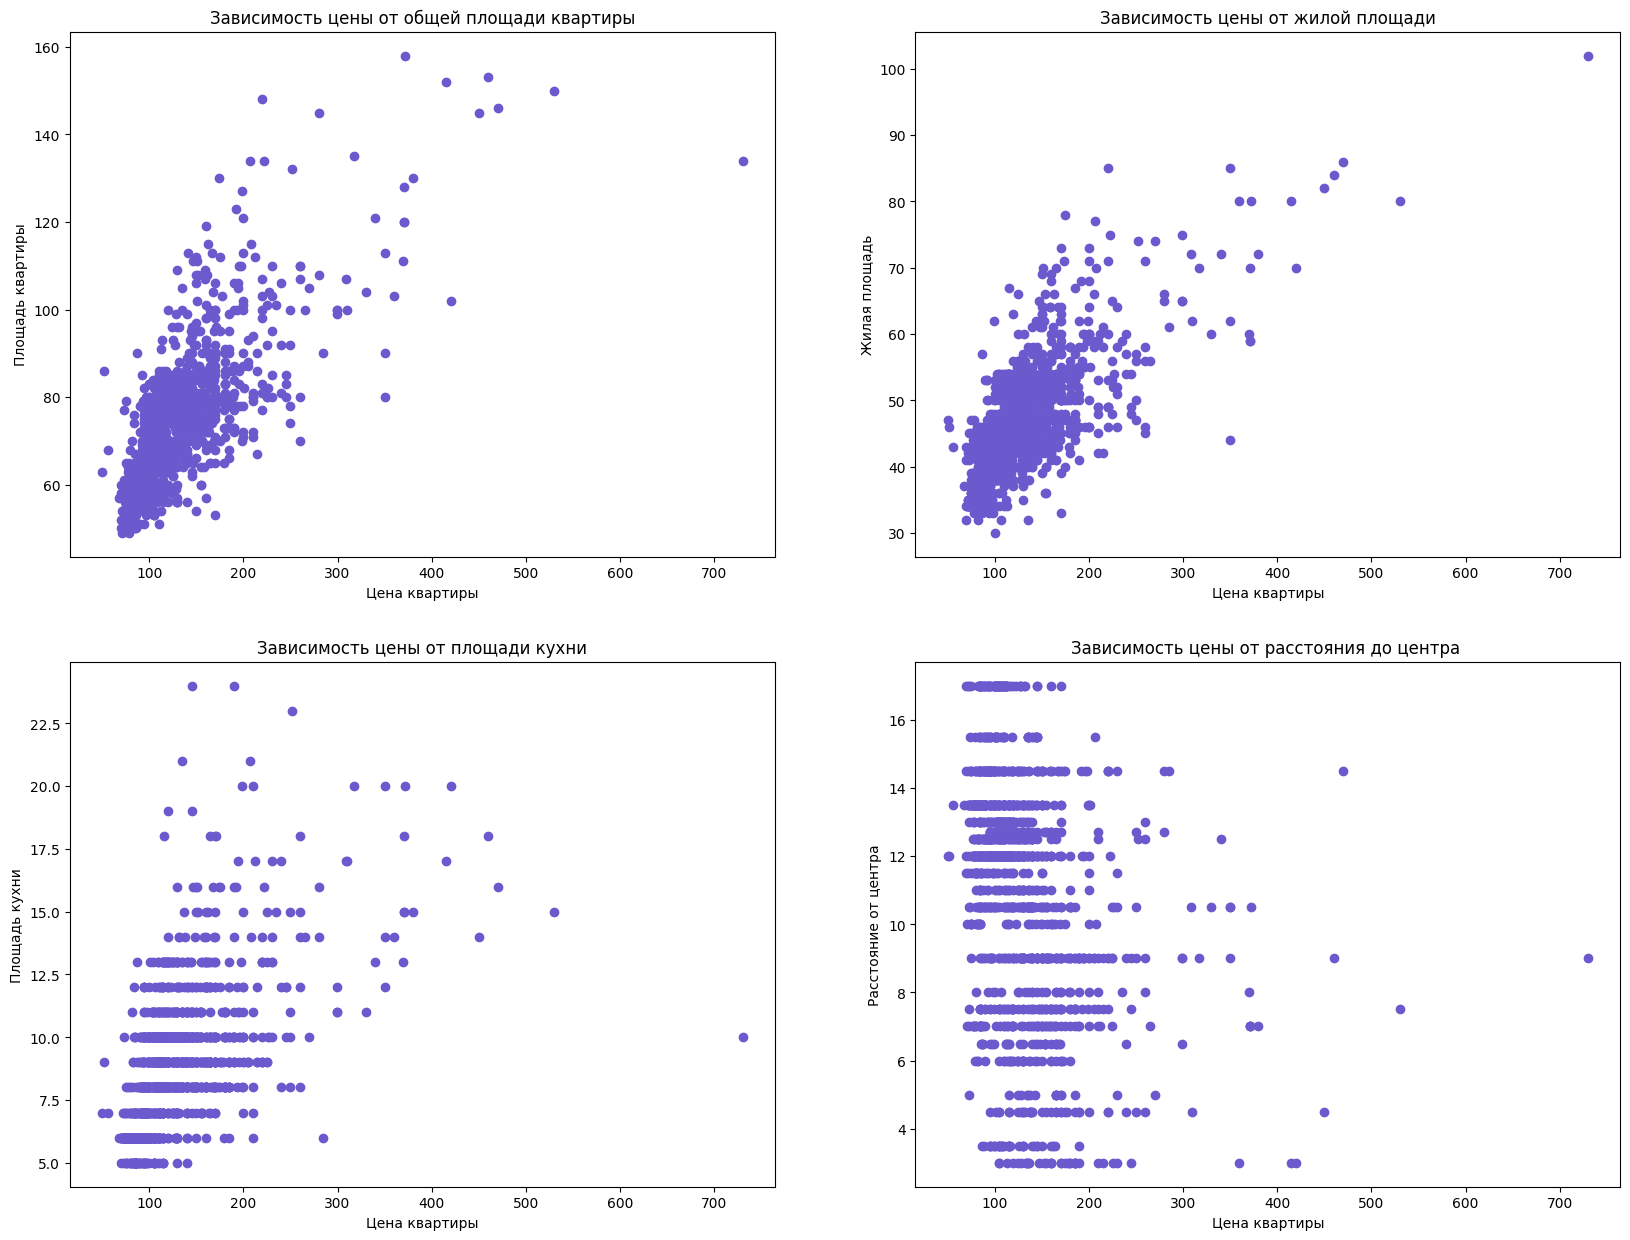

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))


ax1.scatter(df["price"], df["totsp"], color="slateblue")
ax1.set_xlabel("Цена квартиры")
ax1.set_ylabel("Площадь квартиры")
ax1.set_title("Зависимость цены от общей площади квартиры")

ax2.scatter(df["price"], df["livesp"], color="slateblue")
ax2.set_xlabel("Цена квартиры" )
ax2.set_ylabel("Жилая площадь" )
ax2.set_title("Зависимость цены от жилой площади" )

ax3.scatter(df["price"], df["kitsp"], color="slateblue")
ax3.set_xlabel("Цена квартиры" )
ax3.set_ylabel("Площадь кухни" )
ax3.set_title("Зависимость цены от площади кухни")

ax4.scatter(df["price"], df["dist"], color="slateblue")
ax4.set_xlabel("Цена квартиры")
ax4.set_ylabel("Расстояние от центра")
ax4.set_title("Зависимость цены от расстояния до центра ")#Написал расстояние до центра, ибо звучало бы неоч(от расстояния от центра), а так и звучит православно и смысл не меняется

Text(0.5, 1.0, 'Зависимость цены от расстояния до метро ')

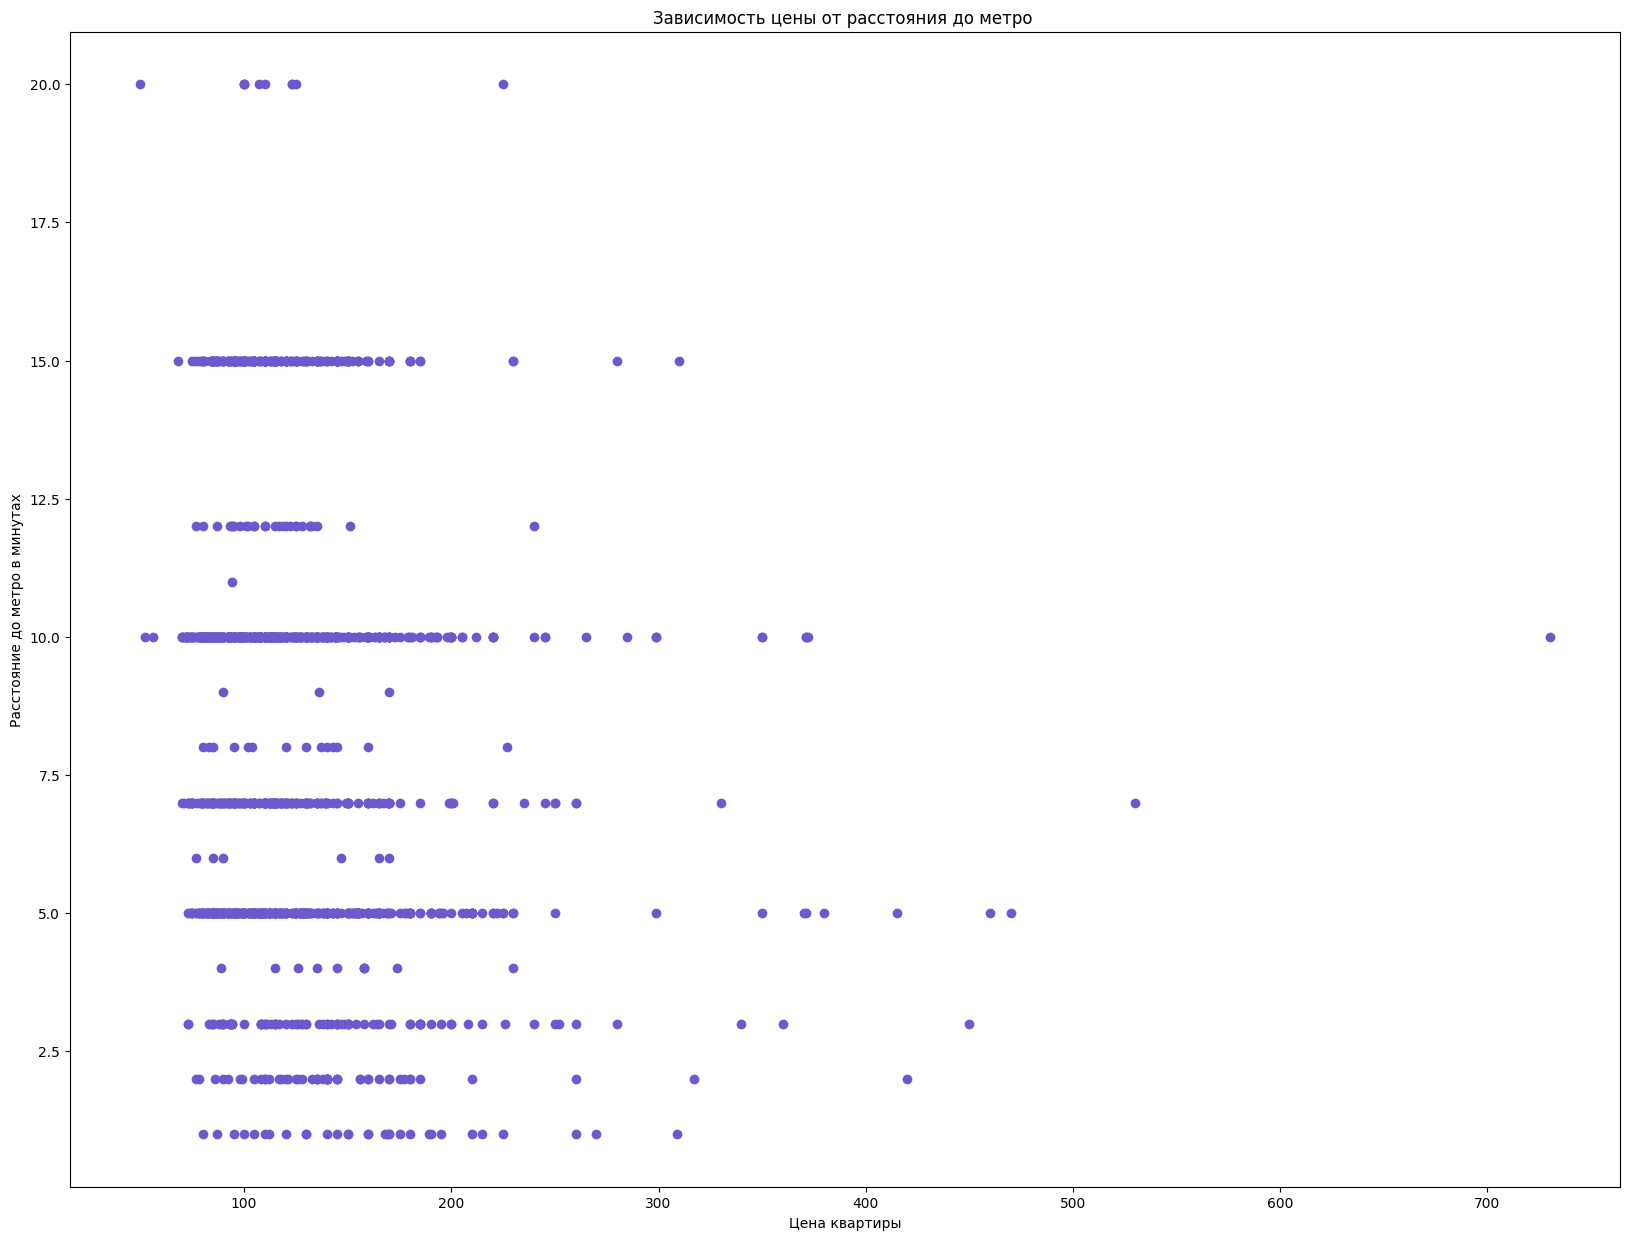

In [17]:
fig, (ax5) = plt.subplots(1, 1, figsize=(20, 15))
ax5.scatter(df["price"], df["metrdist"], color="slateblue")
ax5.set_xlabel("Цена квартиры")
ax5.set_ylabel("Расстояние до метро в минутах")
ax5.set_title("Зависимость цены от расстояния до метро ")

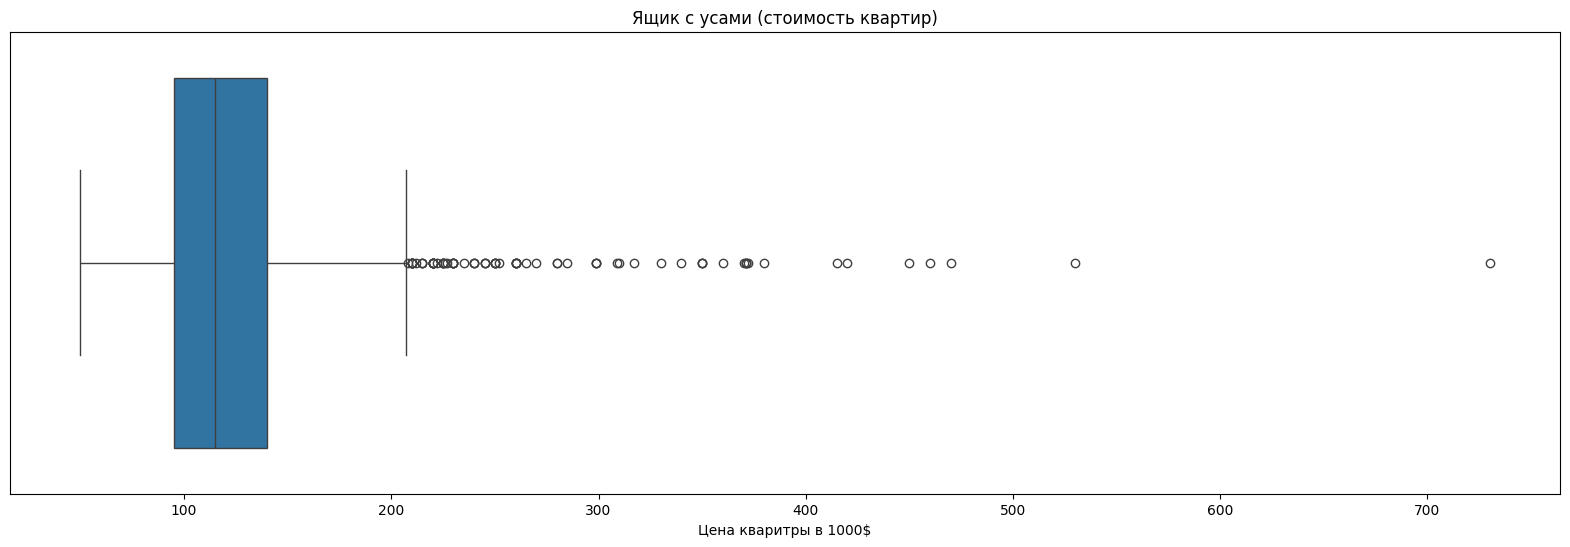

In [22]:
plt.figure(figsize = (20,6))
plt.title('Ящик с усами (стоимость квартир)')
plt.xlabel('Цена кваритры в 1000$')
sns.boxplot(df['price'], orient = 'h')
plt.yticks([]);

Украл идею у прошлых курсов о разделении квартир на разные категории стоимости

In [24]:
# Cоздадим новые датафреймы.

iqr = np.percentile(df['price'], 75) - np.percentile(df['price'], 25)
df_main = df[df['price'] < np.percentile(df['price'], 75) + 1.5 * iqr]
df_elite = df[df['price'] >= np.percentile(df['price'], 75) + 1.5 * iqr]

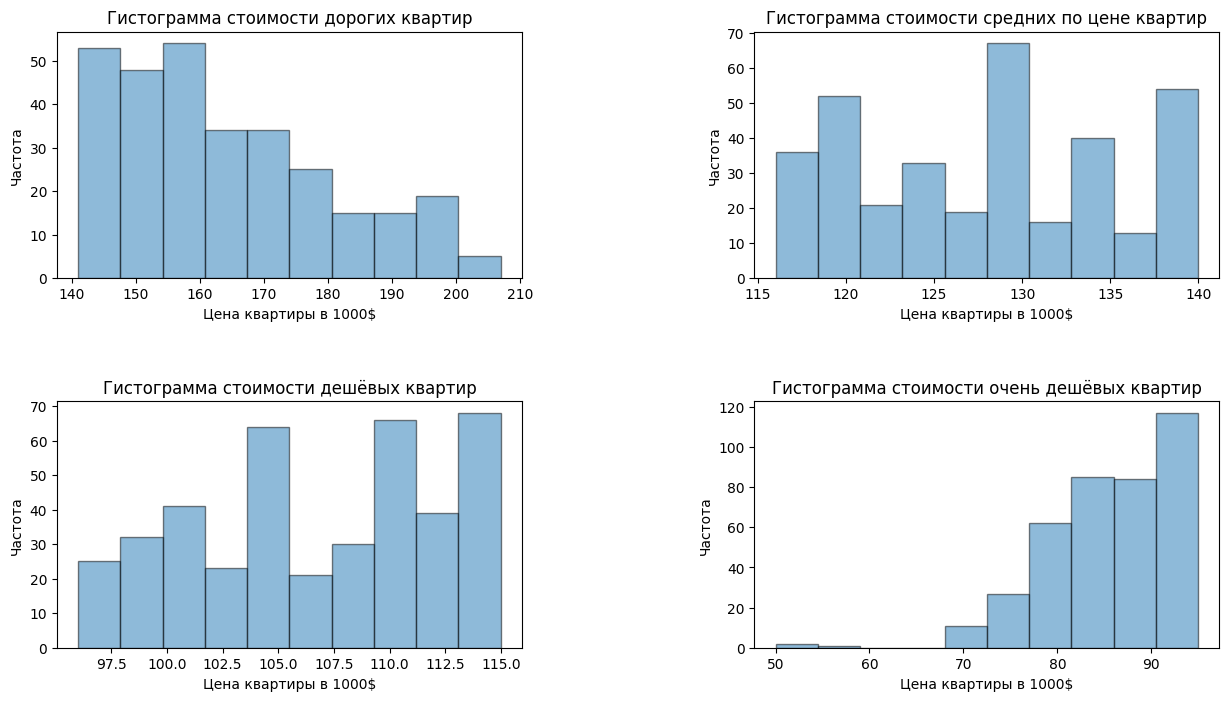

In [26]:
fig, axs = plt.subplots(2, 2, figsize = (15, 8))

axs[0, 0].hist(df.loc[(df['price'] > np.percentile(df['price'], 75)) & (df['price'] <= np.percentile(df['price'], 75) + 1.5 * iqr), ['price']].copy(), edgecolor='black', alpha = 0.5) # 
axs[0, 0].set_title('Гистограмма стоимости дорогих квартир')
axs[0, 0].set_xlabel('Цена квартиры в 1000$')
axs[0, 0].set_ylabel('Частота')
axs[0, 1].hist(df.loc[(df['price'] > np.percentile(df['price'], 50)) & (df['price'] <= np.percentile(df['price'], 75)), ['price']].copy(), edgecolor='black', alpha = 0.5) 
axs[0, 1].set_title('Гистограмма стоимости средних по цене квартир', )
axs[0, 1].set_xlabel('Цена квартиры в 1000$')
axs[0, 1].set_ylabel('Частота')
axs[1, 0].hist(df.loc[(df['price'] > np.percentile(df['price'], 25)) & (df['price'] <= np.percentile(df['price'], 50)), ['price']].copy(), edgecolor='black', alpha = 0.5)
axs[1, 0].set_title('Гистограмма стоимости дешёвых квартир')
axs[1, 0].set_xlabel('Цена квартиры в 1000$')
axs[1, 0].set_ylabel('Частота')
axs[1, 1].hist(df.loc[df['price'] <= np.percentile(df['price'], 25), ['price']].copy(), edgecolor='black', alpha = 0.5)
axs[1, 1].set_title('Гистограмма стоимости очень дешёвых квартир');
axs[1, 1].set_xlabel('Цена квартиры в 1000$')
axs[1, 1].set_ylabel('Частота')

plt.subplots_adjust(hspace= 0.5, wspace= 0.5)

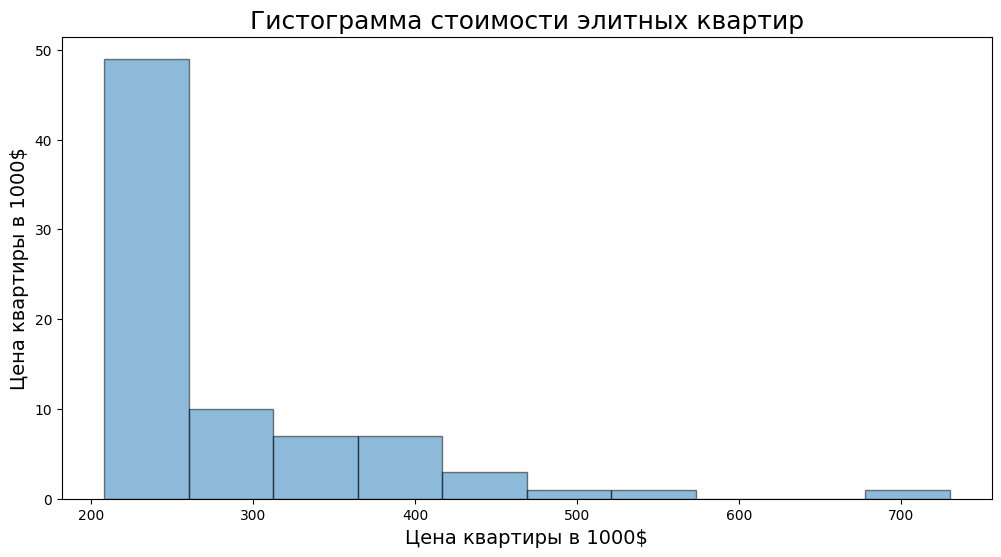

In [27]:
plt.figure(figsize = (12,6))
plt.hist(df_elite['price'], edgecolor = 'black', alpha = 0.5)
plt.title('Гистограмма стоимости элитных квартир', fontsize = 18)
plt.xlabel('Цена квартиры в 1000$', fontsize = 14)
plt.ylabel('Цена квартиры в 1000$', fontsize = 14);